The following are the steps involved in building a model


> Import libraries<br>
> Load dataset<br>
> Preprocessing<br>
> Data Analysis<br>
> Split the dataset<br>
> Training<br>
> Validation<br>
> Testing<br>
> Visualization<br>
> Prediction

## **Import libraries**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier, XGBRFClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix, confusion_matrix, ConfusionMatrixDisplay

## **Load dataset**

In [ ]:
data = pd.read_csv("Paste_the_path_of_dataset.csv")

In [ ]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


## **Preprocessing**

In [ ]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [ ]:
data.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [ ]:
data = data.drop('User ID', axis = 1)

In [ ]:
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Gender'].head()

0    1
1    1
2    0
3    0
4    1
Name: Gender, dtype: int64

In [ ]:
data.describe()

,Gender,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000,400.000000
mean,0.490000,37.655000,69742.500000,0.357500
std,0.500526,10.482877,34096.960282,0.479864
min,0.000000,18.000000,15000.000000,0.000000
25%,0.000000,29.750000,43000.000000,0.000000
50%,0.000000,37.000000,70000.000000,0.000000
75%,1.000000,46.000000,88000.000000,1.000000
max,1.000000,60.000000,150000.000000,1.000000


## **Data Analysis**

<Axes: xlabel='EstimatedSalary', ylabel='Count'>

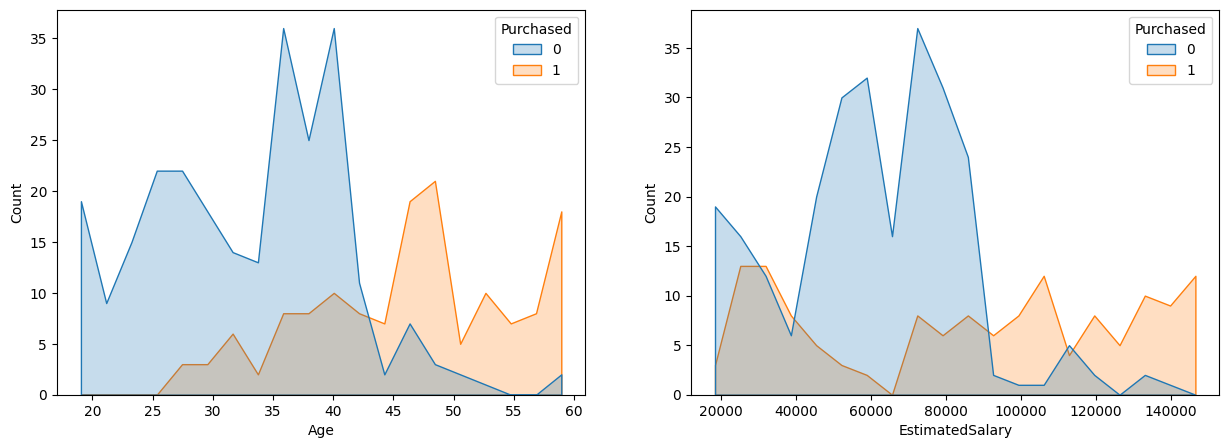

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.histplot(data = data, hue = 'Purchased', x = 'Age', bins = 20, element = 'poly')
plt.subplot(1, 2, 2)
sns.histplot(data = data, hue = 'Purchased', x = 'EstimatedSalary', bins = 20, element = 'poly')

<Axes: xlabel='Purchased', ylabel='EstimatedSalary'>

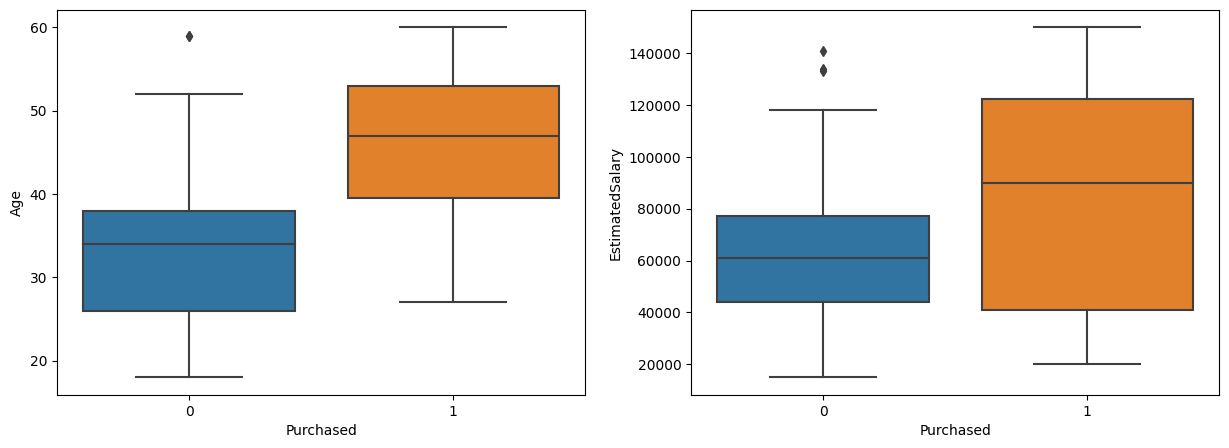

In [ ]:
plt.figure(figsize = (15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(data = data, x = 'Purchased', y = 'Age')
plt.subplot(1, 2, 2)
sns.boxplot(data = data, x = 'Purchased', y = 'EstimatedSalary')

<Axes: xlabel='Age', ylabel='EstimatedSalary'>

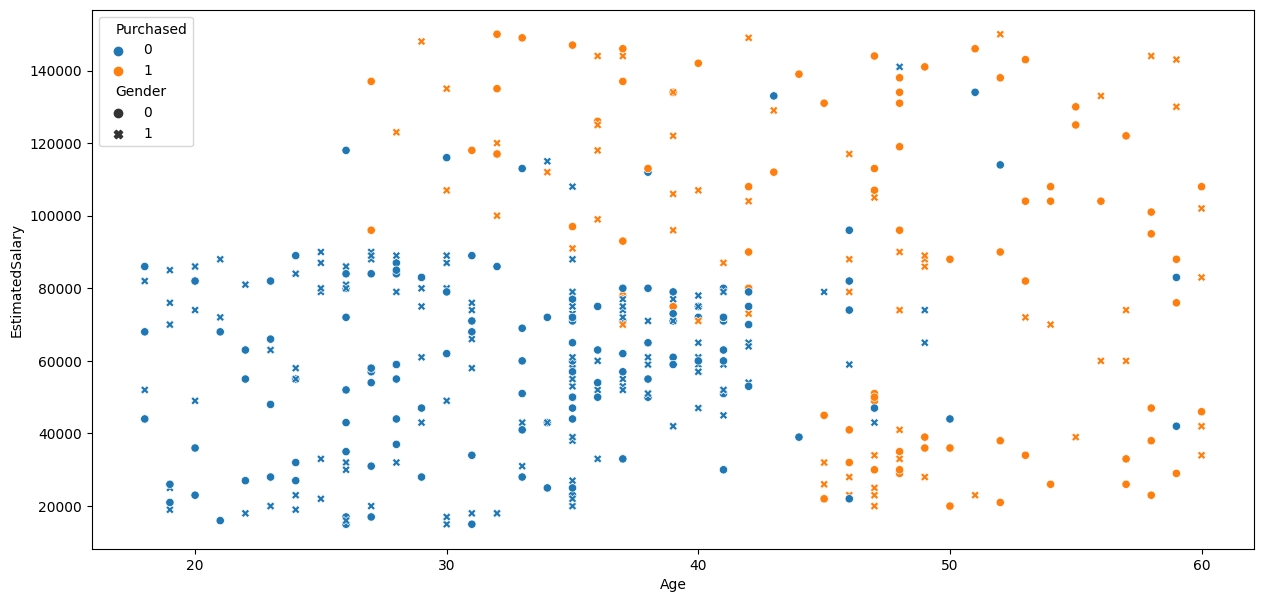

In [ ]:
plt.figure(figsize = (15, 7))
sns.scatterplot(data = data, x = 'Age', y = 'EstimatedSalary', hue = 'Purchased', style = 'Gender')

<Axes: >

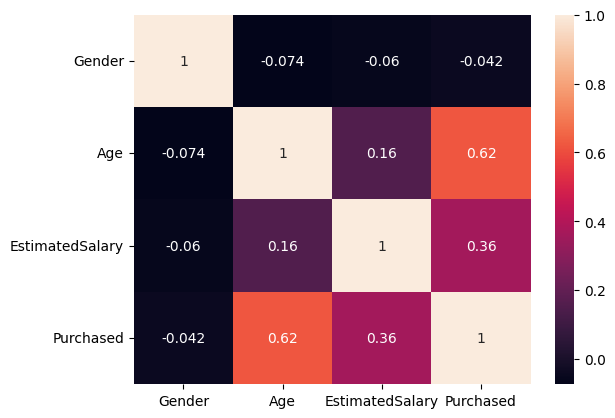

In [ ]:
sns.heatmap(data.corr(), annot = True)

## **Split the dataset**

In [ ]:
Standard_Scaler = StandardScaler()
X = Standard_Scaler.fit_transform(data.drop('Purchased', axis = 1))
y = data['Purchased']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 100)

## **Training**

In [ ]:
Random_Forest = RandomForestClassifier()
Decision_Tree = DecisionTreeClassifier()
KNN = KNeighborsClassifier()
Naive_Bayes = GaussianNB()
Logistic_Regression = LogisticRegression()
SVM = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000, 2000], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 'kernel': ['poly']}
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
AdaBoost = AdaBoostClassifier()
Gradient_Boosting = GradientBoostingClassifier()
XGB = XGBClassifier()
XGBRF = XGBRFClassifier()
LGBM = LGBMClassifier()

In [ ]:
Classifiers = ['Random Forest', 'Decision Tree', 'Naive Bayes', 'Logistic Regression', 'SVM', 'KNN', 'AdaBoost', 'Gradient Boosting', 'XGB', 'XGBRF', 'LGBM']
scores = []
models = [Random_Forest, Decision_Tree, Naive_Bayes, Logistic_Regression, SVM, KNN, AdaBoost, Gradient_Boosting, XGB, XGBRF, LGBM]
for model in models:
  score = cross_val_score(model, X_train, y_train, scoring = 'accuracy', cv = 10).mean()
  scores.append(score)

## **Validation**

In [ ]:
results = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score', ascending = False)
results

,score
KNN,0.912500
SVM,0.908333
XGB,0.904167
XGBRF,0.900000
LGBM,0.891667
Random Forest,0.887500
Gradient Boosting,0.887500
Naive Bayes,0.879167
AdaBoost,0.879167
Decision Tree,0.858333


## **Testing**

In [ ]:
scores = []
for model in models:
  score = cross_val_score(model, X_test, y_test, scoring = 'accuracy', cv = 10).mean()
  scores.append(score)

In [ ]:
results = pd.DataFrame(scores, index = Classifiers, columns = ['score']).sort_values(by = 'score', ascending = False)
results

,score
SVM,0.89375
Random Forest,0.88125
KNN,0.88125
AdaBoost,0.88125
XGBRF,0.88125
Gradient Boosting,0.86875
LGBM,0.86250
Naive Bayes,0.85625
Logistic Regression,0.85000
XGB,0.84375


## **Visualization**

<BarContainer object of 5 artists>

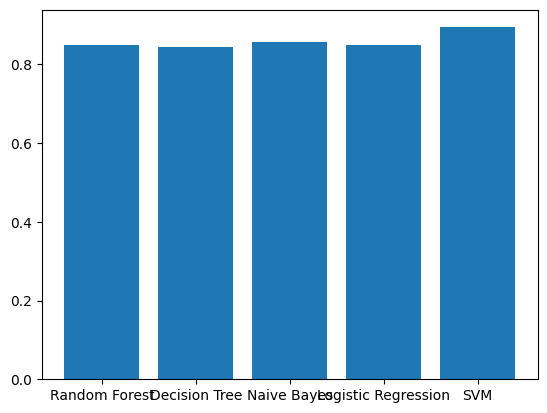

In [ ]:
plt.bar(Classifiers[:5], scores[:5], label = Classifiers[0:5])

In [ ]:
svm = SVM.fit(X_train, y_train)
y_pred = svm.predict(X_test)

In [ ]:
confusion_matrix(y_test, y_pred)

array([[95,  8],
       [ 8, 49]])

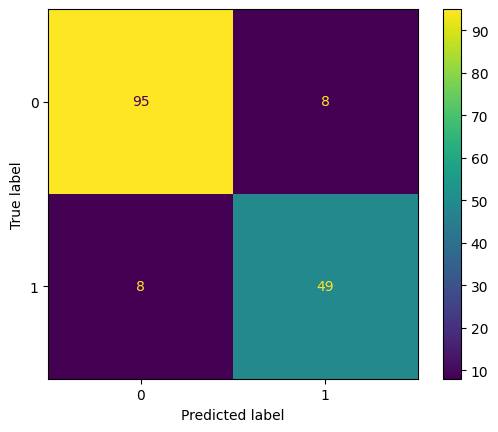

In [ ]:
ConfusionMatrixDisplay.from_estimator(SVM, X_test, y_test)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.92      0.92       103
           1       0.86      0.86      0.86        57

    accuracy                           0.90       160
   macro avg       0.89      0.89      0.89       160
weighted avg       0.90      0.90      0.90       160

